<a href="https://colab.research.google.com/github/dohyung-kim/ccri/blob/main/script/p1_p2_aggregation_adm0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_P1 = pd.read_csv('/content/drive/MyDrive/CCRI_results_misc/Merged_Exposure_Data.csv')
df_P2 = pd.read_csv('/content/drive/MyDrive/CCRI_results_misc/P2_Merged_Normalized_avg.csv')


In [4]:
df_P1.columns

Index(['ISO3', 'name', 'heatwave_frequency_absolute',
       'heatwave_frequency_absolute_min', 'heatwave_frequency_absolute_max',
       'heatwave_frequency_relative', 'heatwave_frequency_relative_min',
       'heatwave_frequency_relative_max', 'heatwave_duration_absolute',
       'heatwave_duration_absolute_min',
       ...
       'fire_frequency_absolute_max', 'fire_frequency_relative',
       'fire_frequency_relative_min', 'fire_frequency_relative_max',
       'fire_FRP_absolute', 'fire_FRP_absolute_min', 'fire_FRP_absolute_max',
       'fire_FRP_relative', 'fire_FRP_relative_min', 'fire_FRP_relative_max'],
      dtype='object', length=104)

In [5]:
df_P2.columns

Index(['iso3', 'P2_WASH_Drinking_Water_value_normalized',
       'P2_WASH_Drinking_Water_min', 'P2_WASH_Drinking_Water_max',
       'P2_WASH_Sanitation_value_normalized', 'P2_WASH_Sanitation_min',
       'P2_WASH_Sanitation_max', 'P2_LSCED_value_normalized', 'P2_LSCED_min',
       'P2_LSCED_max', 'P2_Nutrition_Stunting_Modeled_value_normalized',
       'P2_Nutrition_Stunting_Modeled_min',
       'P2_Nutrition_Stunting_Modeled_max',
       'P2_Child_Mortality_value_normalized', 'P2_Child_Mortality_min',
       'P2_Child_Mortality_max', 'P2_Immunization_DTP1_value_normalized',
       'P2_Immunization_DTP1_min', 'P2_Immunization_DTP1_max',
       'P2_Immunization_DTP3_value_normalized', 'P2_Immunization_DTP3_min',
       'P2_Immunization_DTP3_max', 'P2_PT_Labor_value_normalized',
       'P2_PT_Labor_min', 'P2_PT_Labor_max',
       'P2_Learning_Poverty_value_normalized', 'P2_Learning_Poverty_min',
       'P2_Learning_Poverty_max', 'P2_ED_CR_L2_value_normalized',
       'P2_ED_CR_L2_min', '

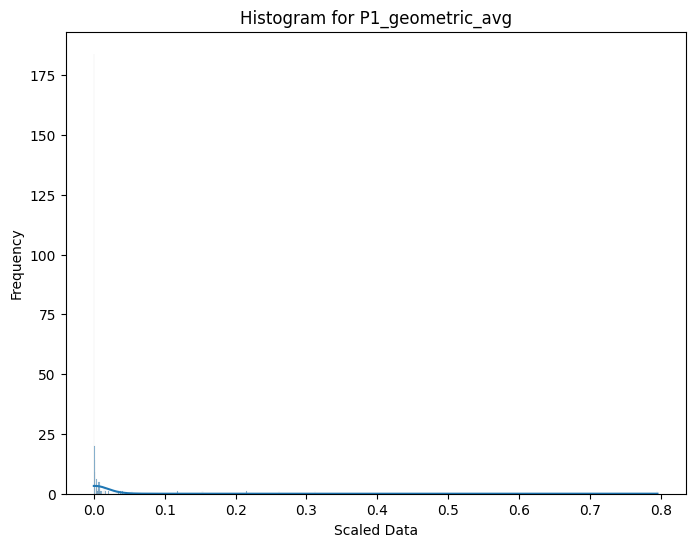

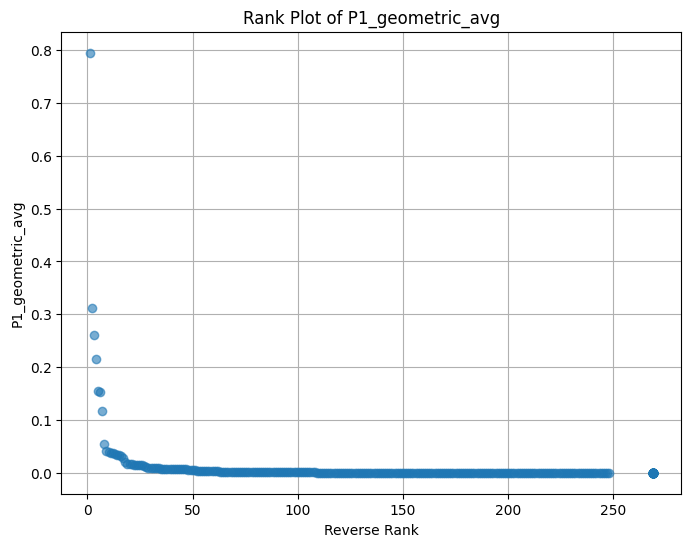

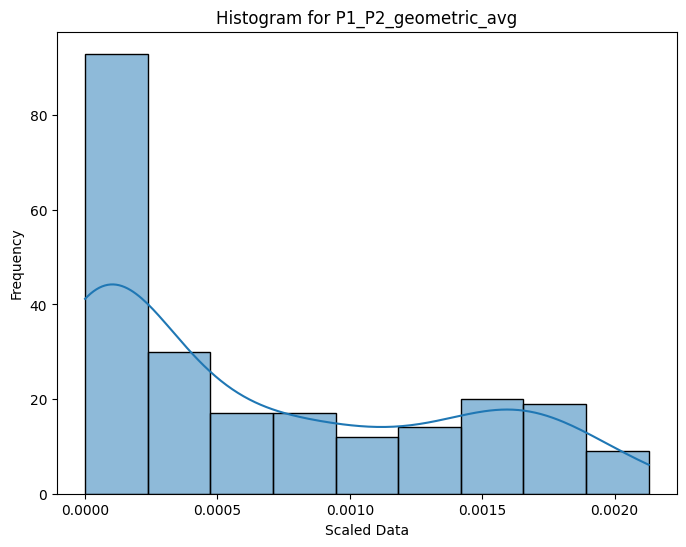

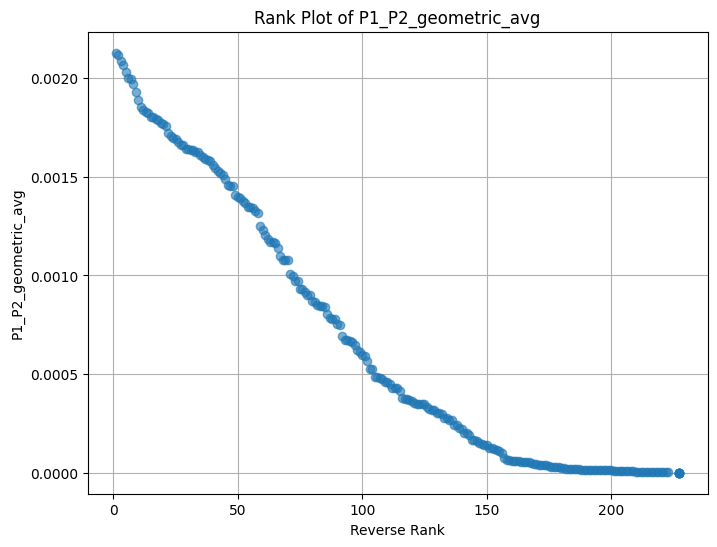

    ISO3  P1_geometric_avg  P2_arithmetic_avg  P1_P2_geometric_avg
0    ABW          0.000030           2.546060             0.092396
1    AFG         10.000000           6.725466             8.865847
2    AGO          7.379389           8.315066             8.598872
3    AIA          0.000003           0.239390             0.020378
4    ALA          0.000000                NaN                  NaN
..   ...               ...                ...                  ...
257  xSI          0.000000                NaN                  NaN
258  xSK          0.000000                NaN                  NaN
259  xSR          0.000000                NaN                  NaN
260  xUK          0.001033                NaN                  NaN
261  xxx          0.000220                NaN                  NaN

[262 rows x 4 columns]


In [6]:
import numpy as np
from scipy.stats import gmean

# Step 1: Calculate Geometric Mean between '_absolute' and '_relative' columns for df_P1
# List of columns ending with '_absolute' and '_relative'
absolute_columns = [col for col in df_P1.columns if '_absolute' in col]
relative_columns = [col for col in df_P1.columns if '_relative' in col]

# Calculate geometric mean for each pair of '_absolute' and '_relative' columns
for abs_col, rel_col in zip(absolute_columns, relative_columns):
    # Apply geometric mean for each pair, ignoring NaN values
    df_P1[abs_col + '_mean'] = df_P1[[abs_col, rel_col]].apply(
        lambda row: gmean(row.dropna() + 1e-10) if len(row.dropna()) > 0 else np.nan, axis=1
    )
    min_value = df_P1[abs_col + '_mean'].min()
    max_value = df_P1[abs_col + '_mean'].max()
    # Scale the df_P1[abs_col + '_mean'] column to range from 0 to 10
    df_P1[abs_col + '_mean'] = 10 *(df_P1[abs_col + '_mean'] - min_value) / (max_value - min_value)

# Step 2: Calculate Geometric Mean across all '_mean' columns in df_P1
# Select columns that are the geometric means (those ending with '_mean')
geometric_mean_columns = [col for col in df_P1.columns if '_mean' in col]

# Calculate the geometric mean for each row across all geometric mean columns
df_P1['P1_geometric_avg'] = df_P1[geometric_mean_columns].apply(
    lambda row: gmean(row[row.notna()] + 1e-10) if np.any(row.notna()) else np.nan, axis=1
)

# Plot histogram and normality check
plt.figure(figsize=(8, 6))
sns.histplot(df_P1['P1_geometric_avg'], kde=True)
plt.title(f"Histogram for P1_geometric_avg")
plt.xlabel("Scaled Data")
plt.ylabel("Frequency")
plt.show()

# Compute ranks in reverse order
df_P1['rank_reverse'] = df_P1['P1_geometric_avg'].rank(method='average', ascending=False)
plt.figure(figsize=(8, 6))
plt.plot(df_P1['rank_reverse'], df_P1['P1_geometric_avg'], marker='o', linestyle='', alpha=0.6)
plt.xlabel("Reverse Rank")
plt.ylabel("P1_geometric_avg")
plt.title(f"Rank Plot of P1_geometric_avg")
plt.grid(True)
plt.show()


# Step 2: Apply Min-Max scaling to 'P1_geometric_avg' based on the plot
df_P1['P1_geometric_avg'] = np.clip(df_P1['P1_geometric_avg'], 0, 0.005)

# Step 6: Apply Min-Max Scaling to 'P1_p2_geometric_avg' to the range 0-10
min_value = df_P1['P1_geometric_avg'].min()
max_value = df_P1['P1_geometric_avg'].max()

# Scale the 'P1_geometric_avg' column to range from 0 to 10
df_P1['P1_geometric_avg'] = 10 * (df_P1['P1_geometric_avg'] - min_value) / (max_value - min_value)

# Step 3: Group by 'ISO3' and calculate the average of 'P1_geometric_avg' for each 'ISO3'
df_P1_grouped = df_P1.groupby('ISO3', as_index=False)['P1_geometric_avg'].mean()

# Step 4: Merge df_P1_grouped with df_P2 on 'ISO3'
merged_df = df_P1_grouped.merge(df_P2[['iso3', 'P2_arithmetic_avg']], left_on='ISO3', right_on='iso3', how='left')

# Step 5: Calculate the Geometric Mean between 'P1_geometric_avg' and 'P2_arithmetic_avg'
merged_df['P1_P2_geometric_avg'] = merged_df.apply(
    lambda row: gmean([row['P1_geometric_avg'], row['P2_arithmetic_avg']] + [1e-10])
    if not np.isnan(row['P1_geometric_avg']) and not np.isnan(row['P2_arithmetic_avg']) else np.nan, axis=1
)

# Plot histogram and normality check
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['P1_P2_geometric_avg'], kde=True)
plt.title(f"Histogram for P1_P2_geometric_avg")
plt.xlabel("Scaled Data")
plt.ylabel("Frequency")
plt.show()

# Compute ranks in reverse order
merged_df['rank_reverse'] = merged_df['P1_P2_geometric_avg'].rank(method='average', ascending=False)
plt.figure(figsize=(8, 6))
plt.plot(merged_df['rank_reverse'], merged_df['P1_P2_geometric_avg'], marker='o', linestyle='', alpha=0.6)
plt.xlabel("Reverse Rank")
plt.ylabel("P1_P2_geometric_avg")
plt.title(f"Rank Plot of P1_P2_geometric_avg")
plt.grid(True)
plt.show()

#final clip and normalization!!!
merged_df['P1_P2_geometric_avg'] = np.clip(merged_df['P1_P2_geometric_avg'], 0, 0.0025)

# Step 6: Apply Min-Max Scaling to 'P1_p2_geometric_avg' to the range 0-10
min_value = merged_df['P1_P2_geometric_avg'].min()
max_value = merged_df['P1_P2_geometric_avg'].max()
# Scale the 'P1_p2_geometric_avg' column to range from 0 to 10
merged_df['P1_P2_geometric_avg'] = 10 * (merged_df['P1_P2_geometric_avg'] - min_value) / (max_value - min_value)

# Now 'merged_df' contains the scaled 'P1_p2_geometric_avg_scaled'
print(merged_df[['ISO3', 'P1_geometric_avg', 'P2_arithmetic_avg', 'P1_P2_geometric_avg']])


In [6]:
np.max(merged_df['P1_P2_geometric_avg'])

10.0

In [7]:
merged_df.to_csv('/content/drive/MyDrive/CCRI_results_misc/p1_p2_avg_ccri.csv', index=False)

In [7]:
import geopandas as gpd
import pandas as pd

# Load the GeoJSON file as a GeoDataFrame
geo_df = gpd.read_file("/content/drive/MyDrive/CCRI_results_misc/child_pop_summaryadm0_geojson.geojson")


In [17]:
df_P1

,ISO3,name,heatwave_frequency_absolute,heatwave_frequency_absolute_min,heatwave_frequency_absolute_max,heatwave_frequency_relative,heatwave_frequency_relative_min,heatwave_frequency_relative_max,heatwave_duration_absolute,heatwave_duration_absolute_min,...,drought_sma_absolute_min_mean,drought_sma_absolute_max_mean,fire_frequency_absolute_mean,fire_frequency_absolute_min_mean,fire_frequency_absolute_max_mean,fire_FRP_absolute_mean,fire_FRP_absolute_min_mean,fire_FRP_absolute_max_mean,P1_geometric_avg,rank_reverse
0,ATA,Antarctica,0.000000,2,8,0.000000,10,100,0.000000,2,...,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.000000,269.0
1,AIA,Anguilla,0.000000,2,8,0.000000,10,100,0.000000,2,...,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.000003,231.0
2,ESH,Western Sahara,4.930217,2,8,7.641221,10,100,4.802939,2,...,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,2.770807,84.0
3,PYF,French Polynesia,3.066019,2,8,1.087698,10,100,3.066019,2,...,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.000106,204.0
4,PYF,Clipperton Island,0.000000,2,8,0.000000,10,100,0.000000,2,...,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.000000,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,UMI,Palmyra Atoll,0.000000,2,8,0.000000,10,100,0.000000,2,...,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.000000,269.0
285,UMI,Navassa Island,0.000000,2,8,0.000000,10,100,0.000000,2,...,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.000000,269.0
286,MNP,Northern Mariana Is. (USA),2.233032,2,8,2.079772,10,100,0.728660,2,...,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,0.000111,202.0
287,PRI,Puerto Rico (USA),5.928282,2,8,8.497511,10,100,5.455338,2,...,NaN,NaN,0.0,NaN,NaN,0.000024,NaN,NaN,0.005019,168.0


In [18]:

# Ensure the key for merging is consistent (e.g., 'ISO3' in df_P1 and 'iso3' in df_P2)
# Merge with merged_df (use 'ISO3' from merged_df and 'iso3' from geo_df or merged_df as needed)
merged_geo_df = geo_df.merge(merged_df, left_on='ISO3', right_on='ISO3', how='left')
merged_geo_df = merged_geo_df.merge(df_P1, left_on='ISO3', right_on='ISO3', how='left')
merged_geo_df = merged_geo_df.merge(df_P2, left_on='ISO3', right_on='iso3', how='left')


# Save the merged GeoDataFrame as a new GeoJSON file
output_geojson = "/content/drive/MyDrive/CCRI_results_misc/p1_p2_avg_ccri_0323.geojson"
merged_geo_df.to_file(output_geojson, driver='GeoJSON')

print(f"Merged GeoDataFrame saved to {output_geojson}")

Merged GeoDataFrame saved to /content/drive/MyDrive/CCRI_results_misc/p1_p2_avg_ccri_0323.geojson


In [19]:
merged_geo_df.columns

Index(['ISO3', 'child_population', 'name_x', 'geometry', 'P1_geometric_avg_x',
       'iso3_x', 'P2_arithmetic_avg_x', 'P1_P2_geometric_avg',
       'rank_reverse_x', 'name_y',
       ...
       'P2_Social_Protection_max', 'P2_basic_hygiene_value_normalized',
       'P2_basic_hygiene_min', 'P2_basic_hygiene_max',
       'P2_electricity_access_value_normalized', 'P2_electricity_access_min',
       'P2_electricity_access_max', 'P2_arithmetic_avg_y', 'rank_reverse',
       'P2_geometric_avg'],
      dtype='object', length=220)

In [121]:
df_P1['P1_geometric_avg'].describe()

,P1_geometric_avg
count,289.000000
mean,2.483120
std,3.835996
min,0.000000
25%,0.000026
50%,0.088766
75%,3.616511
max,10.000000
